The goal here is to plot out `rotSkyPos` and `rotTelPos` distributions *for different fields* before and after rotational dithers. The data is already saved by running `save_rot_data.py`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import pandas as pd
import numpy as np
from matplotlib import cm
import time

In [2]:
fontsize = 18
#pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

**Set up**

In [3]:
data_path = '/global/homes/a/awan/desc/wp_descDithers_csvs/compare_rot_dith/'
outdir = data_path

**Get the data**

In [4]:
%%time
# get all the files
data_files = [f for f in os.listdir(data_path) if f.endswith('csv')]

# now read in the data
simdatas = {}
for i, file in enumerate(data_files): # loop over all the db files
    print(file)
    db = file.split('_data.csv')[0]
    simdatas[db] = pd.read_csv('%s/%s'%(data_path, file))
print('\n## Read in data for %s dbs'%(i))

kraken_2044_data.csv
baseline2018a_data.csv
colossus_2665_data.csv
mothra_2049_data.csv
kraken_2035_data.csv
colossus_2664_data.csv
mothra_2045_data.csv
pontus_2489_data.csv
kraken_2042_data.csv
kraken_2026_data.csv
nexus_2097_data.csv
kraken_2036_data.csv
pontus_2502_data.csv
pontus_2002_data.csv
colossus_2667_data.csv

## Read in data for 14 dbs
CPU times: user 25.1 s, sys: 1.89 s, total: 27 s
Wall time: 27 s


**Set up to plot things**

In [5]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', \
       'colossus_2665', 'colossus_2664', 'colossus_2667', 'pontus_2002', \
       'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097']
#       'alt_sched', 'alt_sched_rolling']

**Figure out the min, maxs on the arrays**

In [6]:
mins = {'tel': 100, 'dithtel': 100, 'sky': 100, 'dithsky': 10}
maxs = {'tel': -100, 'dithtel': -100, 'sky': -100, 'dithsky': -100}
for db in dbs:
    # add the dithered rotSkyPos column
    dith_skypos = np.array(simdatas[db]['randomDitherPerFilterChangeRotTelPos']-simdatas[db]['PA'])
    # wrap the dithered rotSkyPos
    ind = dith_skypos < 0
    dith_skypos[ind] += 360
    
    simdatas[db]['randomDitherPerFilterChangeRotSkyPos'] = dith_skypos.copy()
    
    # look at the min, max
    mins['tel'] = min(mins['tel'], min(simdatas[db]['rotTelPos']))
    mins['dithtel'] = min(mins['dithtel'], min(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    mins['sky'] = min(mins['sky'], min(simdatas[db]['rotSkyPos']))
    mins['dithsky'] = min(mins['dithsky'], min(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))
    
    maxs['tel'] = max(maxs['tel'], max(simdatas[db]['rotTelPos']))
    maxs['dithtel'] = max(maxs['dithtel'], max(simdatas[db]['randomDitherPerFilterChangeRotTelPos']))
    maxs['sky'] = max(maxs['sky'], max(simdatas[db]['rotSkyPos']))
    maxs['dithsky'] = max(maxs['dithsky'], max(simdatas[db]['randomDitherPerFilterChangeRotSkyPos']))

print('mins: %s\nmaxs: %s'%(mins, maxs))

mins: {'tel': -90.0, 'dithtel': -90.0, 'sky': 0.0, 'dithsky': 4.9980643304081696e-06}
maxs: {'tel': 90.0, 'dithtel': 90.0, 'sky': 360.0, 'dithsky': 359.99999420744729}


The ranges are now similar for dithered and undithered cases.

**Plot distributions**

In [7]:
bins_telpos = np.arange(-90, 90, 1)
bins_skypos = np.arange(0, 360, 1)

In [8]:
import random

baseline2018a
Saved compare_rot_angles_baseline2018a_perfield_nodith_wdith.png


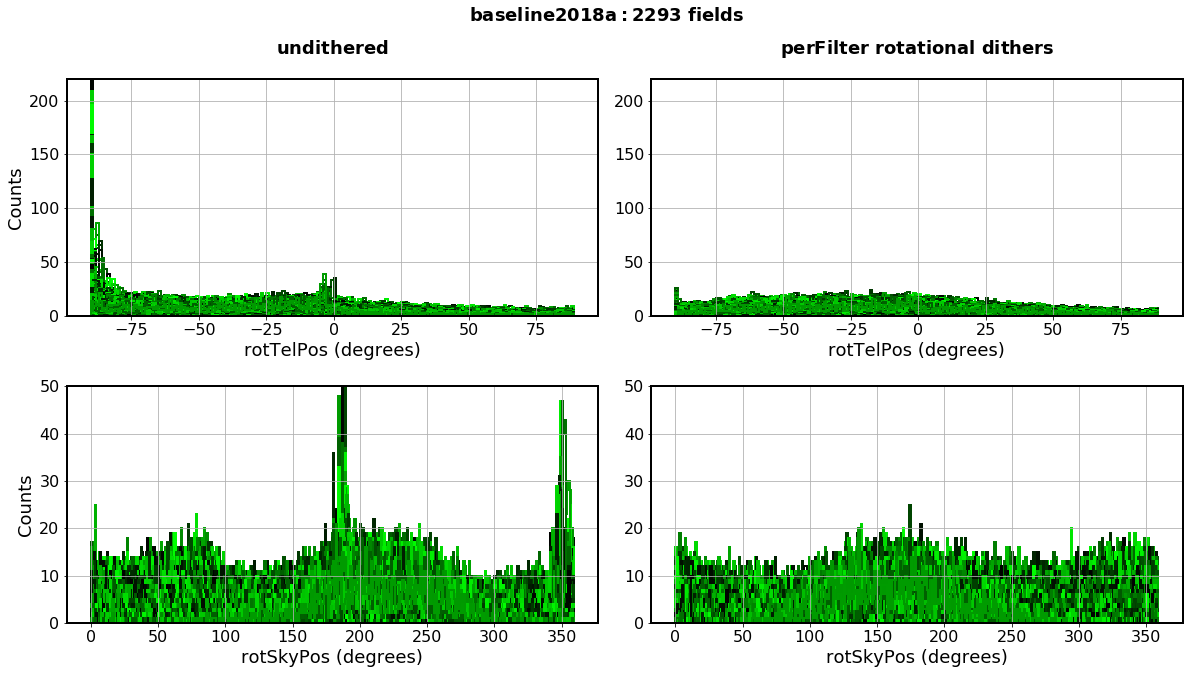

Time taken: 2.20 min

kraken_2026
Saved compare_rot_angles_kraken_2026_perfield_nodith_wdith.png


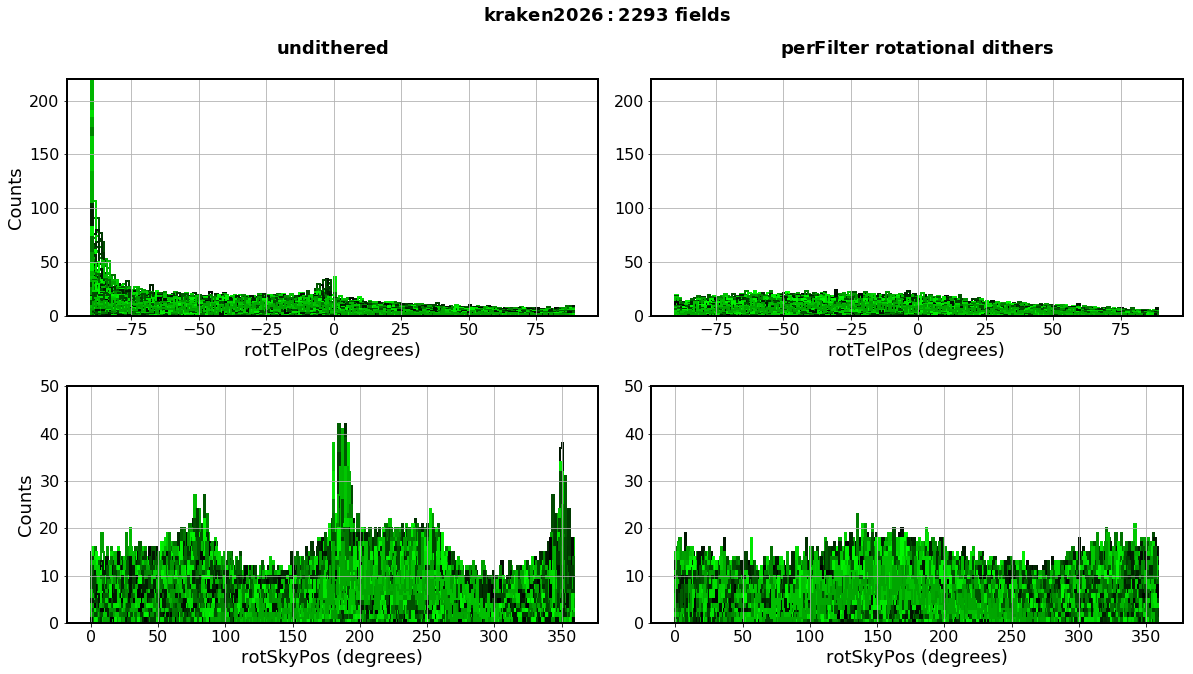

Time taken: 2.20 min

kraken_2035
Saved compare_rot_angles_kraken_2035_perfield_nodith_wdith.png


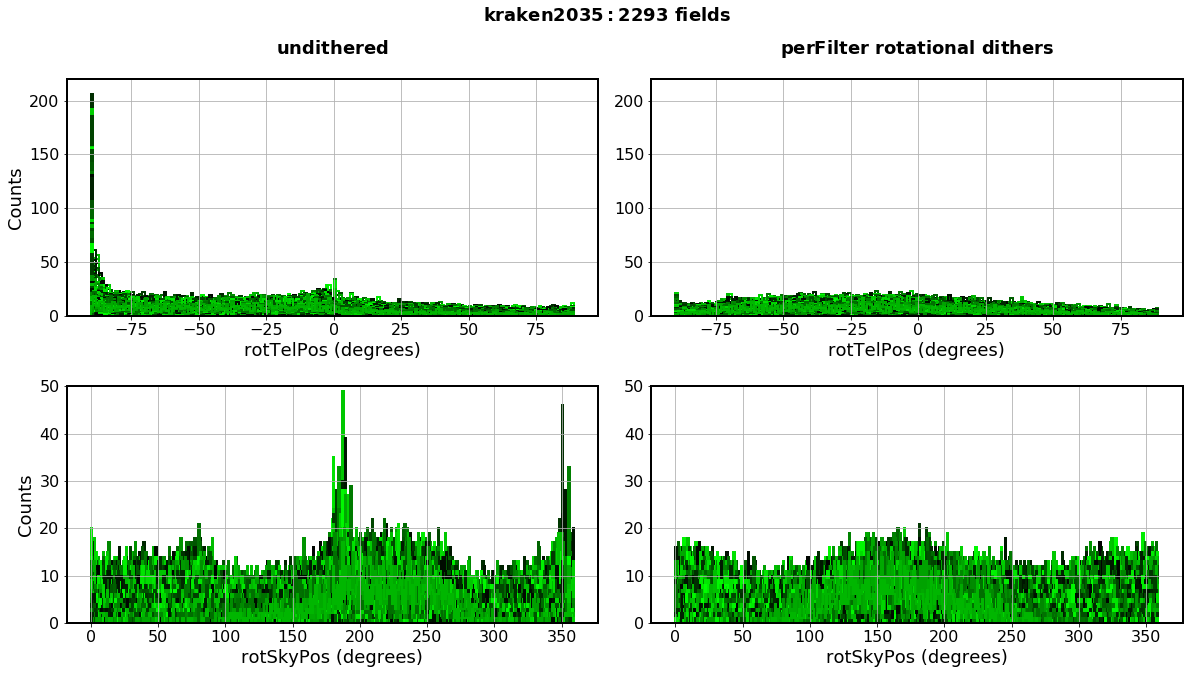

Time taken: 2.19 min

kraken_2036
Saved compare_rot_angles_kraken_2036_perfield_nodith_wdith.png


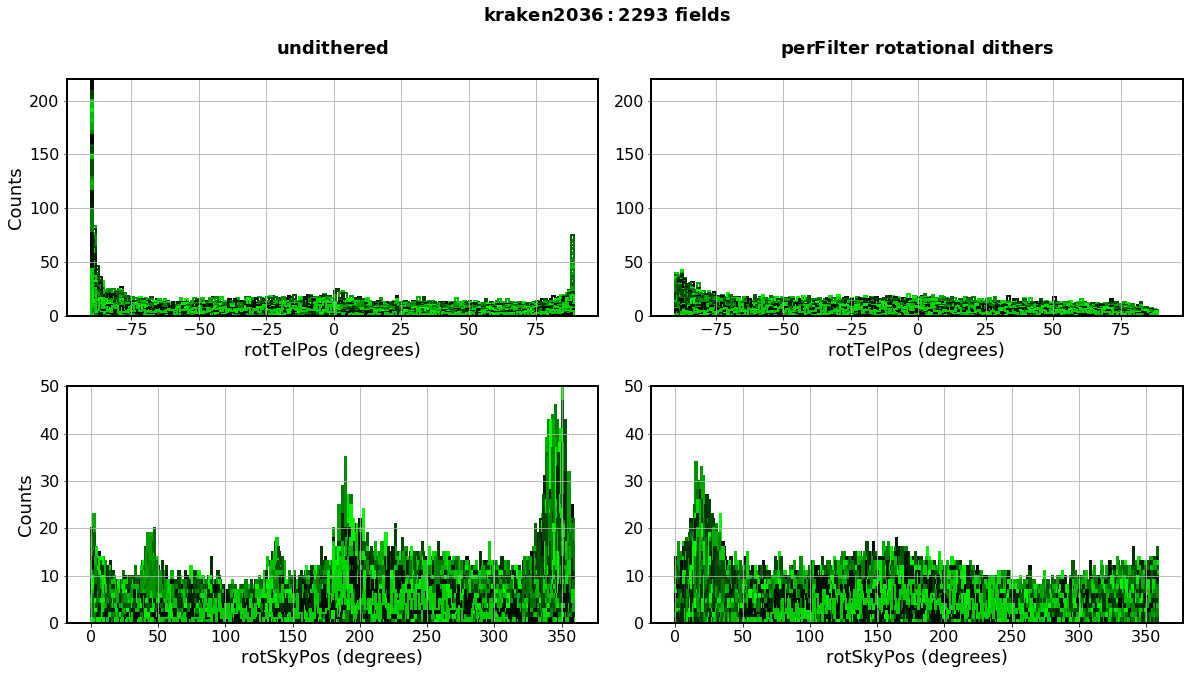

Time taken: 2.13 min

colossus_2665
Saved compare_rot_angles_colossus_2665_perfield_nodith_wdith.png


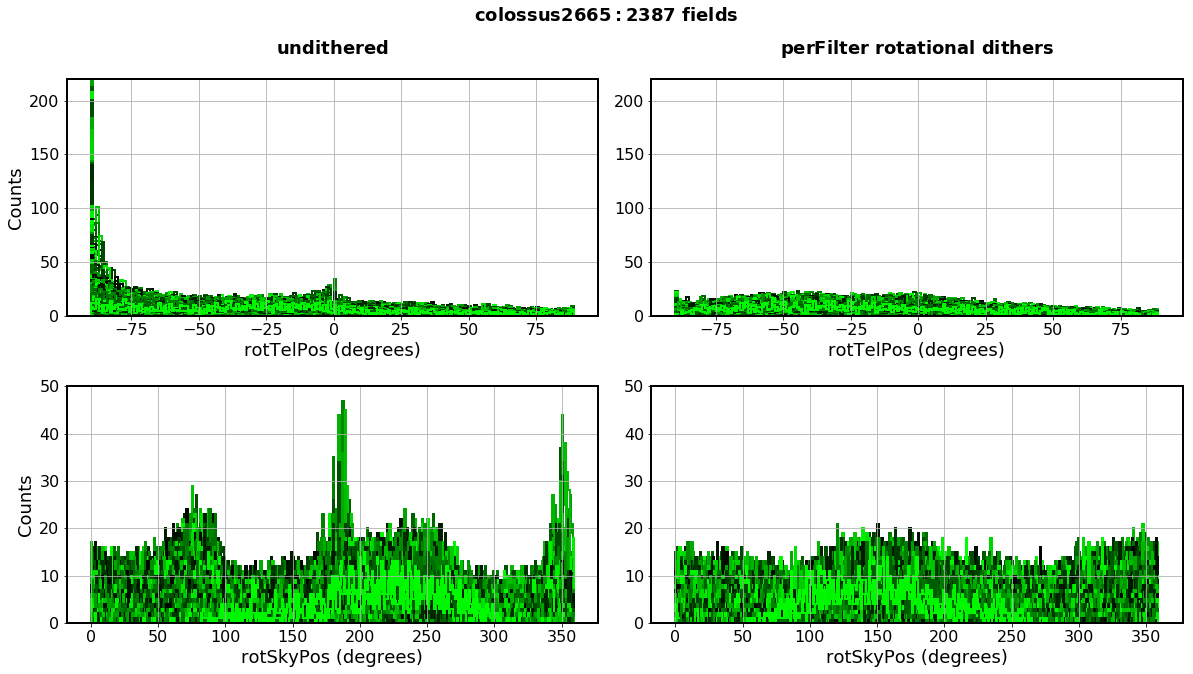

Time taken: 2.40 min

colossus_2664
Saved compare_rot_angles_colossus_2664_perfield_nodith_wdith.png


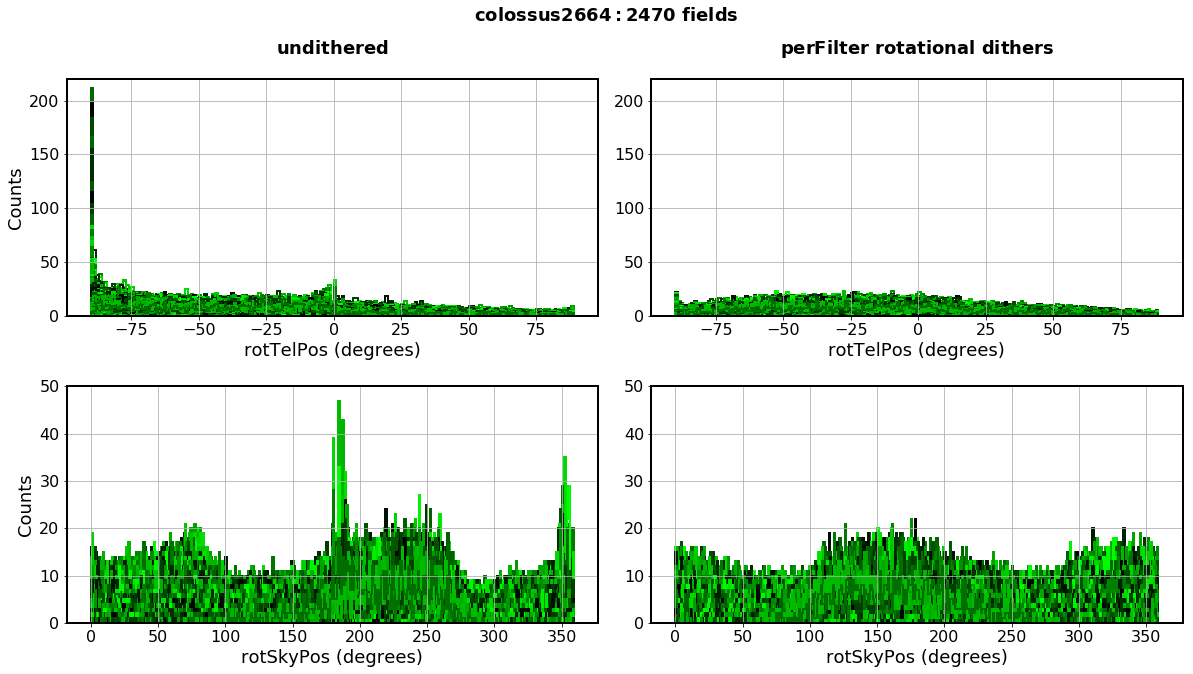

Time taken: 2.70 min

colossus_2667
Saved compare_rot_angles_colossus_2667_perfield_nodith_wdith.png


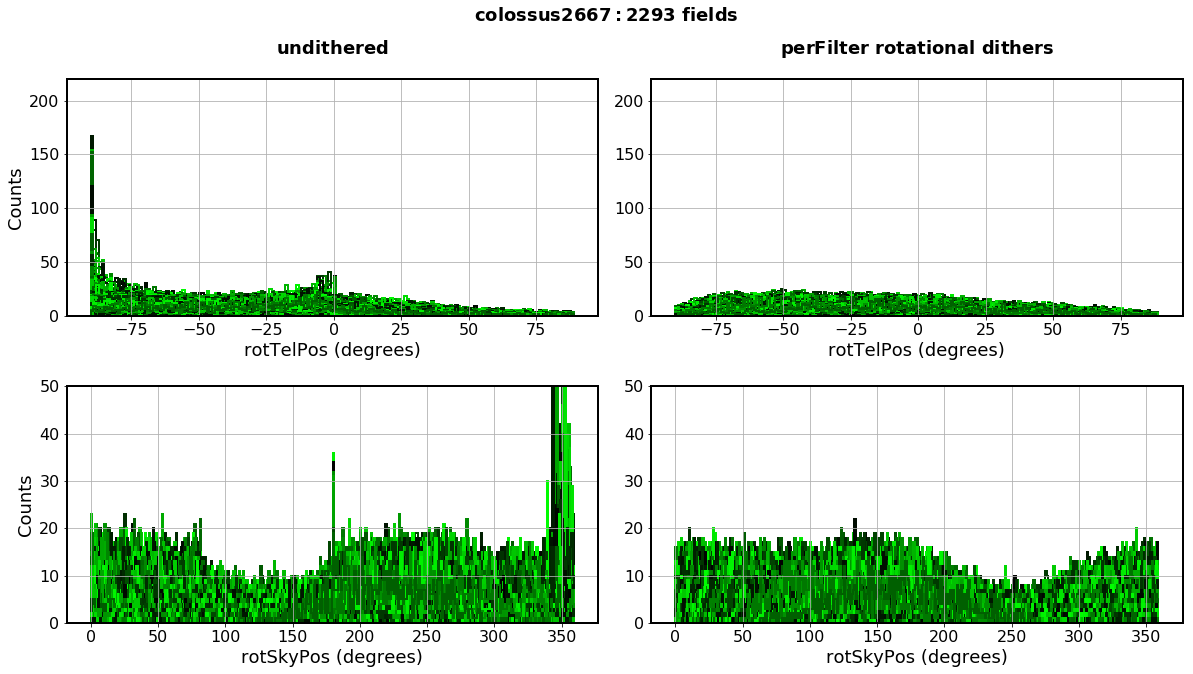

Time taken: 2.41 min

pontus_2002
Saved compare_rot_angles_pontus_2002_perfield_nodith_wdith.png


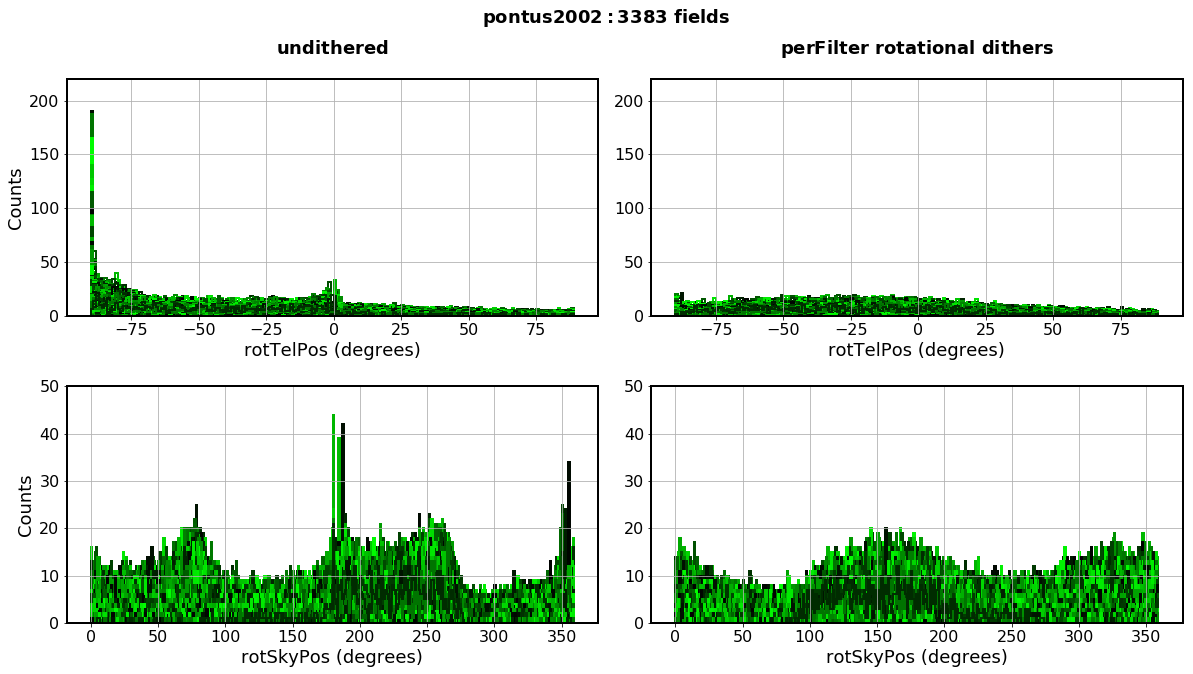

Time taken: 5.35 min

pontus_2489
Saved compare_rot_angles_pontus_2489_perfield_nodith_wdith.png


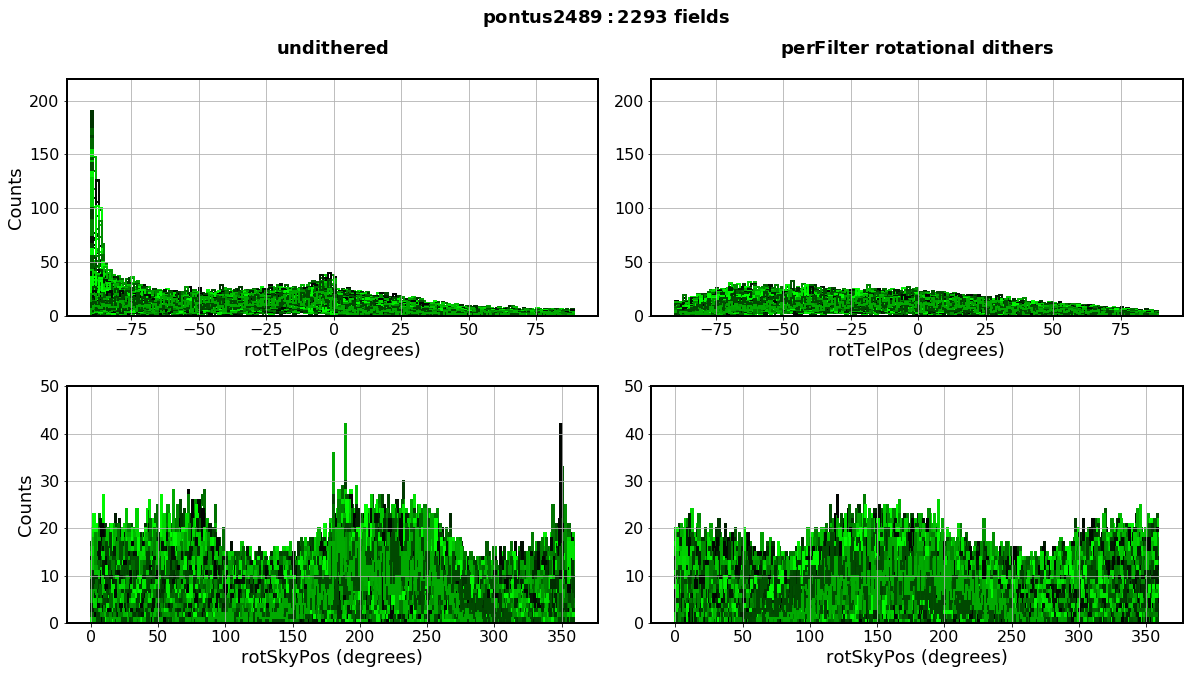

Time taken: 2.07 min

pontus_2502
Saved compare_rot_angles_pontus_2502_perfield_nodith_wdith.png


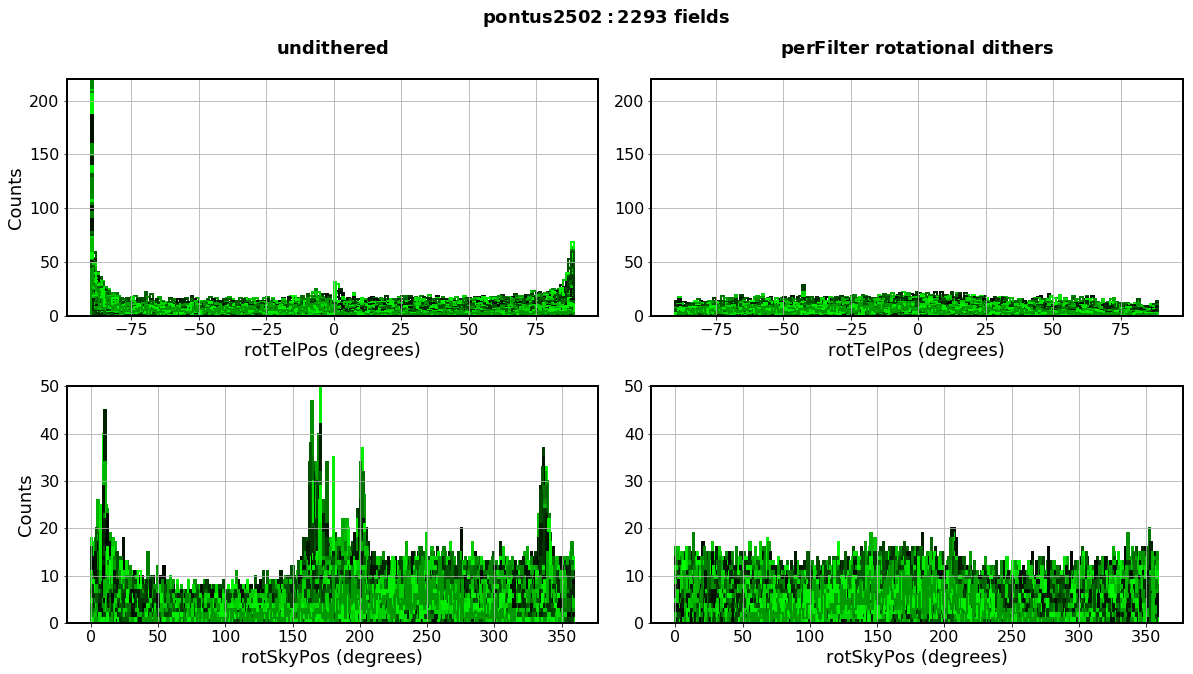

Time taken: 2.24 min

mothra_2045
Saved compare_rot_angles_mothra_2045_perfield_nodith_wdith.png


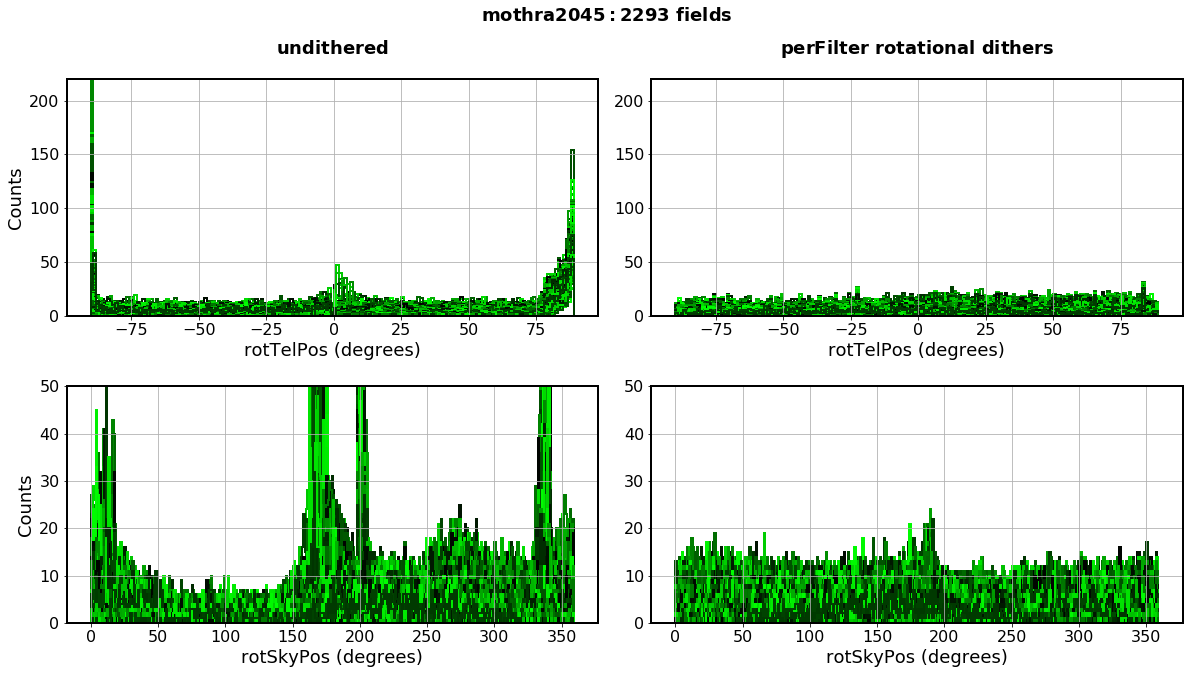

Time taken: 2.15 min

kraken_2042
Saved compare_rot_angles_kraken_2042_perfield_nodith_wdith.png


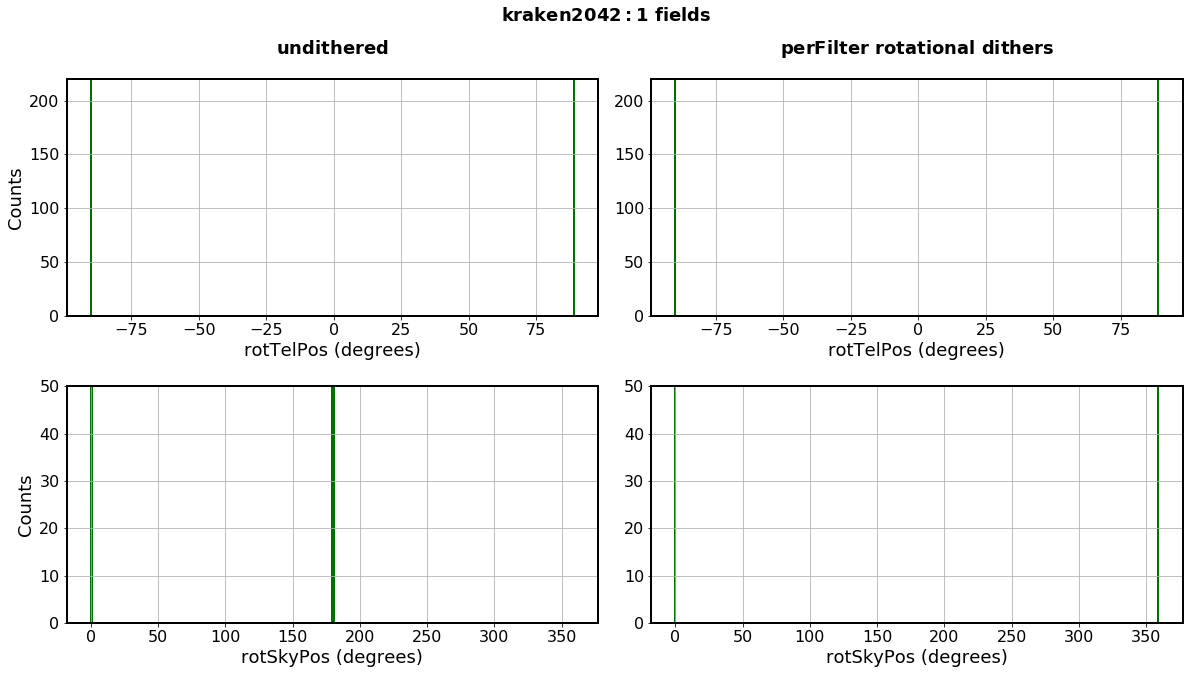

Time taken: 0.02 min

kraken_2044
Saved compare_rot_angles_kraken_2044_perfield_nodith_wdith.png


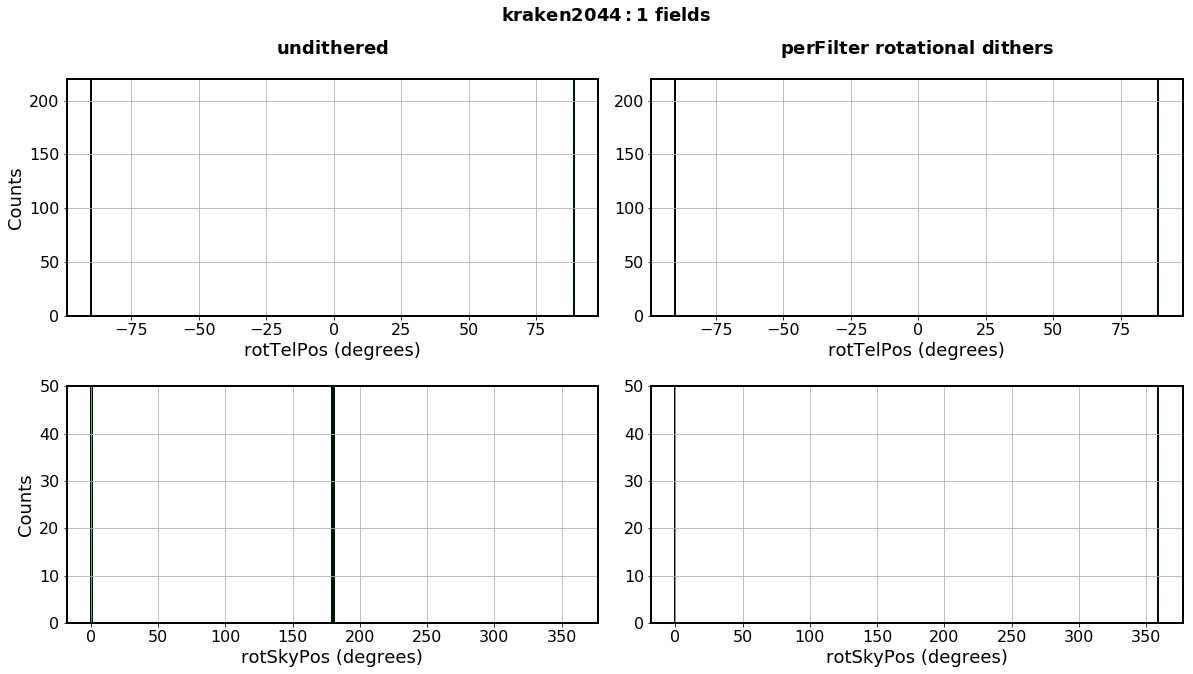

Time taken: 0.02 min

mothra_2049
Saved compare_rot_angles_mothra_2049_perfield_nodith_wdith.png


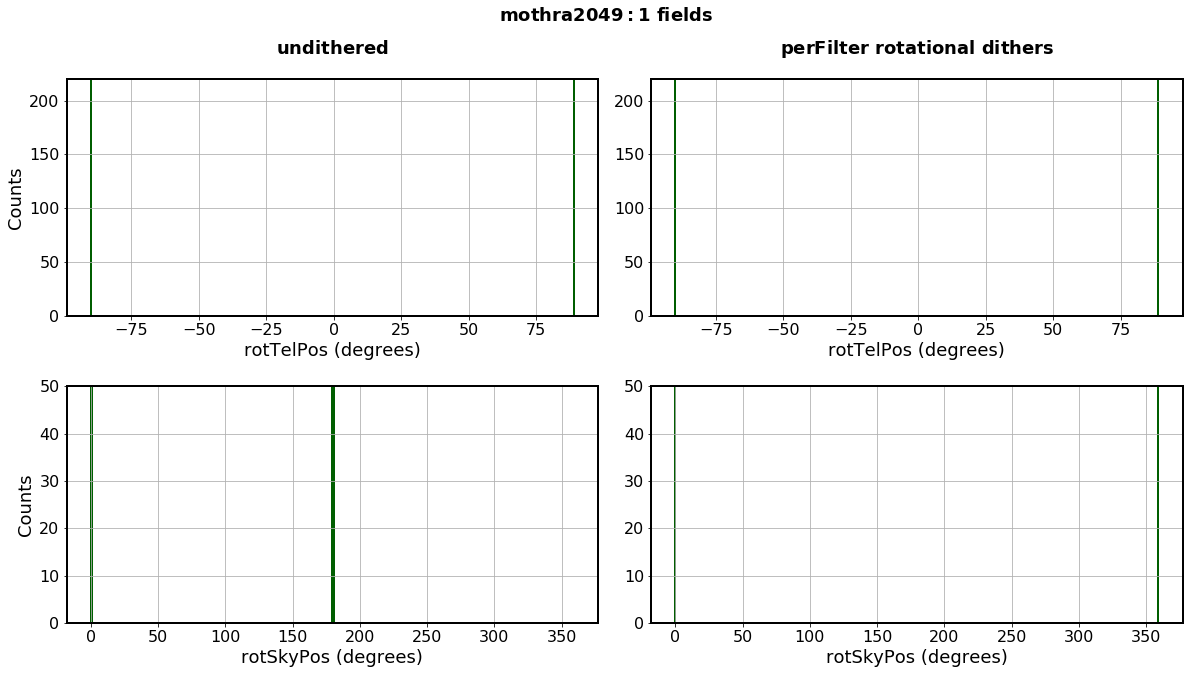

Time taken: 0.02 min

nexus_2097
Saved compare_rot_angles_nexus_2097_perfield_nodith_wdith.png


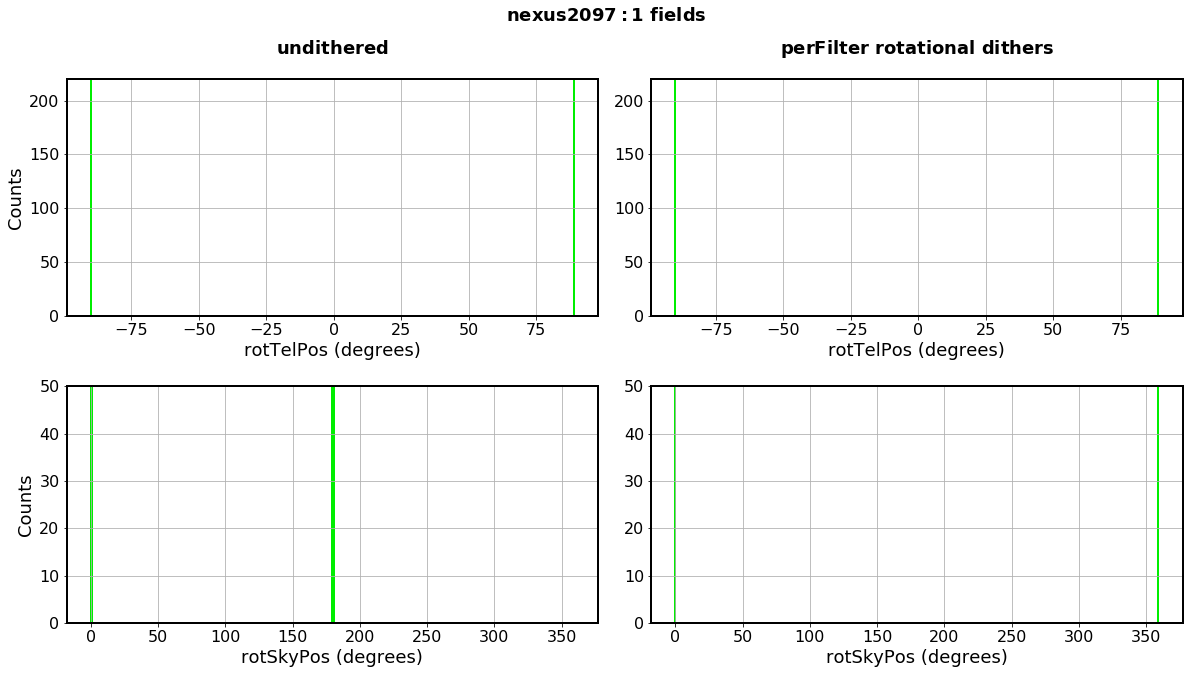

Time taken: 0.04 min



In [9]:
for k, db in enumerate(dbs):
    time0 = time.time()
    print(db)
    fids = np.unique(simdatas[db]['fieldId'])
        
    nrows, ncols = 2,2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    
    nfids = len(fids)
    colors = [(0, np.random.random(), 0) for i in range(nfids)]

    for j, fid in enumerate(fids):
        ind = np.where(simdatas[db]['fieldId'] == fid)[0]
        axes[0, 0].hist(simdatas[db]['rotTelPos'][ind], bins=bins_telpos, color=colors[j],
                        histtype='step', lw=2)
        # dithered rotTelPos
        axes[0, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotTelPos'][ind],
                        #label=db, 
                        color=colors[j],
                        bins=bins_telpos, histtype='step', lw=2)
        # undithered rotSkyPos
        axes[1, 0].hist(simdatas[db]['rotSkyPos'][ind],
                        bins=bins_skypos, color=colors[j],
                        histtype='step', lw=2)
        # dithered rotSkyPos
        axes[1, 1].hist(simdatas[db]['randomDitherPerFilterChangeRotSkyPos'][ind],
                        bins=bins_skypos, color=colors[j],
                        histtype='step', lw=2)
        
    ymax_tel, ymax_sky = 220, 50
    for row in range(nrows):
        for col in range(ncols):
            axes[0, col].set_ylim(0, ymax_tel)
            axes[1, col].set_ylim(0, ymax_sky)
            #axes[row, col].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            axes[row, 0].set_ylabel('Counts')
            axes[0, col].set_xlabel('rotTelPos (degrees)')
            axes[1, col].set_xlabel('rotSkyPos (degrees)')
            axes[row, col].grid() 
    #axes[0, 1].legend(bbox_to_anchor=(1.,1))
    axes[0, 0].set_title(r'$\bf{undithered}$', fontsize=fontsize, y=1.08)
    axes[0, 1].set_title(r'$\bf{perFilter \ rotational \ dithers}$', fontsize=fontsize, y=1.08)
    plt.suptitle(r'$\bf{%s}: %s \ fields$'%(db.replace('_', ' '), len(fids)), fontsize=fontsize)
    fig.set_size_inches(20,10)
    filename = 'compare_rot_angles_%s_perfield_nodith_wdith.png'%(db)
    #plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
    print('Saved %s'%filename)
    plt.show()
    print('Time taken: %.2f min\n'%((time.time()-time0)/60.))

Overall trends:
- Rotational dithers appear to be make rotTelPos distributions more unform, ridding of the pile-ups at -90 degree.
- The dithers seem to be helping rotSkyPos only a little, removing strong. pile-ups. A lot of the trends are still retained/
- Some dbs (nexus_2097, mothra_2049, kraken_2044, kraken_2042) have only two values for the rot angle and have only 1 field. Why?